60182968_김민지_11주차

In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import seaborn as sns
sns.get_dataset_names()

C:\Users\min22\anaconda3\lib\site-packages\bs4\__init__.py:177: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 194 of the file C:\Users\min22\anaconda3\lib\runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  warnings.warn(self.NO_PARSER_SPECIFIED_WARNING % dict(


['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'geyser',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'taxis',
 'tips',
 'titanic']

In [3]:
df=sns.load_dataset('iris')
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


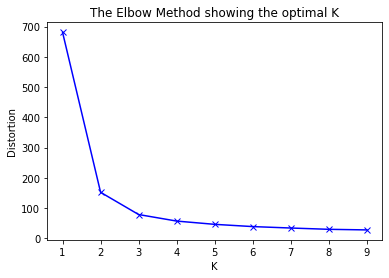

In [4]:
X=df.drop('species', axis=1)
inertia_arr=[]
K=range(1,10)
for k in K :
    #모델적합
    kmeanModel = KMeans(n_clusters=k, random_state = 0).fit(X)
    inertia = kmeanModel.inertia_
    inertia_arr.append(inertia)

#plot the elbow
plt.plot(K, inertia_arr, 'bx-')
plt.xlabel('K')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal K')
plt.show()

In [5]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

KMeans(n_clusters=3)

In [6]:
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [7]:
#웬데이터에 클러스터링 결과 추가
df['cluster_id']=kmeans.labels_
df

,sepal_length,sepal_width,petal_length,petal_width,species,cluster_id
0,5.1,3.5,1.4,0.2,setosa,1
1,4.9,3.0,1.4,0.2,setosa,1
2,4.7,3.2,1.3,0.2,setosa,1
3,4.6,3.1,1.5,0.2,setosa,1
4,5.0,3.6,1.4,0.2,setosa,1
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,2
146,6.3,2.5,5.0,1.9,virginica,0
147,6.5,3.0,5.2,2.0,virginica,2
148,6.2,3.4,5.4,2.3,virginica,2


In [8]:
#cluster_id를 오름차순으로 출력
df = df.sort_values(by='cluster_id')
df

,sepal_length,sepal_width,petal_length,petal_width,species,cluster_id
74,6.4,2.9,4.3,1.3,versicolor,0
83,6.0,2.7,5.1,1.6,versicolor,0
82,5.8,2.7,3.9,1.2,versicolor,0
81,5.5,2.4,3.7,1.0,versicolor,0
80,5.5,2.4,3.8,1.1,versicolor,0
...,...,...,...,...,...,...
120,6.9,3.2,5.7,2.3,virginica,2
122,7.7,2.8,6.7,2.0,virginica,2
124,6.7,3.3,5.7,2.1,virginica,2
110,6.5,3.2,5.1,2.0,virginica,2


## 차원 축소 - PCA(주성분 분석)

In [11]:
from sklearn.preprocessing import StandardScaler

df=sns.load_dataset('iris')
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
df['cluster_id']=kmeans.labels_

df_scaled = StandardScaler().fit_transform(df.drop(['species'], axis=1))

In [12]:
df

,sepal_length,sepal_width,petal_length,petal_width,species,cluster_id
0,5.1,3.5,1.4,0.2,setosa,0
1,4.9,3.0,1.4,0.2,setosa,0
2,4.7,3.2,1.3,0.2,setosa,0
3,4.6,3.1,1.5,0.2,setosa,0
4,5.0,3.6,1.4,0.2,setosa,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,2
146,6.3,2.5,5.0,1.9,virginica,1
147,6.5,3.0,5.2,2.0,virginica,2
148,6.2,3.4,5.4,2.3,virginica,2


In [13]:
df_scaled

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00, -1.20774157e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00, -1.20774157e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00, -1.20774157e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00, -1.20774157e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00, -1.20774157e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00, -1.20774157e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00, -1.20774157e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00, -1.20774157e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00, -1.20774157e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00

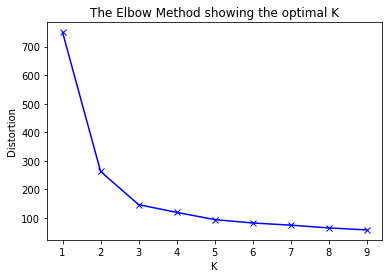

In [14]:
#오차제곱합으로 최적 클러스터 갯수 찾기
X=df_scaled

inertia_arr=[]
K=range(1,10)

for k in K :
    kmeanModel = KMeans(n_clusters=k, random_state=0).fit(X)
    inertia = kmeanModel.inertia_
    inertia_arr.append(inertia)  

plt.plot(K, inertia_arr, 'bx-')
plt.xlabel('K')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal K')
plt.show()

In [15]:
from sklearn.decomposition import PCA

#차원 갯수 설정 : 그래프 상에 나타내기 위해서 2개로 설정
pca = PCA(n_components = 2)
pca.fit(df_scaled)

df_pca = pca.transform(df_scaled)

print("축소전 : ", df_scaled.shape)
print("축소후 : ", df_pca.shape)

축소전 :  (150, 5)
축소후 :  (150, 2)


In [16]:
df_pca

array([[-2.55994181e+00,  5.15329958e-01],
       [-2.41493742e+00, -6.44508172e-01],
       [-2.65599082e+00, -2.99070613e-01],
       [-2.60258646e+00, -5.56806191e-01],
       [-2.66610071e+00,  6.87963928e-01],
       [-2.38265915e+00,  1.51273140e+00],
       [-2.71949948e+00,  9.37619591e-02],
       [-2.53527305e+00,  2.57764001e-01],
       [-2.63945576e+00, -1.07142924e+00],
       [-2.50220851e+00, -4.35015712e-01],
       [-2.46795964e+00,  1.07233419e+00],
       [-2.61676320e+00,  1.72832013e-01],
       [-2.53501096e+00, -6.92242427e-01],
       [-2.89678214e+00, -9.03639483e-01],
       [-2.48685303e+00,  1.88741325e+00],
       [-2.53002188e+00,  2.71528996e+00],
       [-2.49760156e+00,  1.51340988e+00],
       [-2.49498114e+00,  5.20683030e-01],
       [-2.23123517e+00,  1.41950673e+00],
       [-2.61938362e+00,  1.16555887e+00],
       [-2.25735035e+00,  4.26949494e-01],
       [-2.50337693e+00,  9.55896786e-01],
       [-3.00149462e+00,  5.19117677e-01],
       [-2.

In [17]:
cols=["pc1","pc2"]
df_pca = pd.DataFrame(data=df_pca, columns=cols)
df_pca

,pc1,pc2
0,-2.559942,0.515330
1,-2.414937,-0.644508
2,-2.655991,-0.299071
3,-2.602586,-0.556806
4,-2.666101,0.687964
...,...,...
145,2.332236,0.380717
146,1.400193,-0.963154
147,2.027128,0.279895
148,1.909958,1.028532


In [18]:
df_pca["name"]=df.species
df_pca["target"]=df.cluster_id

In [19]:
df_pca

,pc1,pc2,name,target
0,-2.559942,0.515330,setosa,0
1,-2.414937,-0.644508,setosa,0
2,-2.655991,-0.299071,setosa,0
3,-2.602586,-0.556806,setosa,0
4,-2.666101,0.687964,setosa,0
...,...,...,...,...
145,2.332236,0.380717,virginica,2
146,1.400193,-0.963154,virginica,1
147,2.027128,0.279895,virginica,2
148,1.909958,1.028532,virginica,2


## 시각화

Text(0, 0.5, 'pc2')

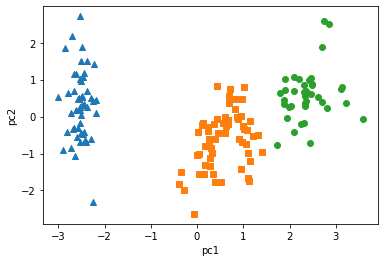

In [21]:
# 세가지 종류의 marker로 그래프 상에 좌표 표시
markers=["^", "s", "o"]
for i, marker in enumerate(markers):
    x_val=df_pca[df_pca["target"]==i]["pc1"]
    y_val=df_pca[df_pca["target"]==i]["pc2"]
    plt.scatter(x_val, y_val, marker=marker)

    
plt.xlabel("pc1")
plt.ylabel("pc2")

## 맞춘 비율

In [22]:
df_pca

,pc1,pc2,name,target
0,-2.559942,0.515330,setosa,0
1,-2.414937,-0.644508,setosa,0
2,-2.655991,-0.299071,setosa,0
3,-2.602586,-0.556806,setosa,0
4,-2.666101,0.687964,setosa,0
...,...,...,...,...
145,2.332236,0.380717,virginica,2
146,1.400193,-0.963154,virginica,1
147,2.027128,0.279895,virginica,2
148,1.909958,1.028532,virginica,2


In [23]:
df_pca["name"]=df_pca.name.map({"setosa":0, "versicolor":1, "virginica":2})

In [24]:
df_pca

,pc1,pc2,name,target
0,-2.559942,0.515330,0,0
1,-2.414937,-0.644508,0,0
2,-2.655991,-0.299071,0,0
3,-2.602586,-0.556806,0,0
4,-2.666101,0.687964,0,0
...,...,...,...,...
145,2.332236,0.380717,2,2
146,1.400193,-0.963154,2,1
147,2.027128,0.279895,2,2
148,1.909958,1.028532,2,2


In [25]:
n=0
for i in range(150):
    if df_pca.name[i]==df_pca.target[i]:
        n+=1
print(n)

134


In [27]:
print(n/150)

0.8933333333333333
